In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pedigree as pd 

# Pedigree's loading

In [17]:
ped = pd.Pedigree()
ped.load('../data/ped/fam9.ped')
for people in ped.get_pedigree().values():
    print(people)

[9 1 0 0 0 {'4', '8', '10', '6'}]
[9 2 0 0 0 {'4', '8', '10', '6'}]
[9 3 0 0 0 {'13', '11', '12'}]
[9 4 2 1 0 {'13', '11', '12'}]
[9 5 0 0 0 {'14', '15', '16'}]
[9 6 2 1 0 {'14', '15', '16'}]
[9 7 0 0 0 {'18', '19', '17'}]
[9 8 2 1 0 {'18', '19', '17'}]
[9 9 0 0 0 {'21', '22', '20'}]
[9 10 2 1 0 {'21', '22', '20'}]
[9 11 3 4 0 set()]
[9 12 3 4 0 set()]
[9 13 3 4 0 set()]
[9 14 6 5 0 set()]
[9 15 6 5 0 set()]
[9 16 6 5 0 set()]
[9 17 8 7 0 set()]
[9 18 8 7 0 set()]
[9 19 8 7 0 set()]
[9 20 9 10 0 set()]
[9 21 9 10 0 set()]
[9 22 9 10 0 set()]


# Bayesien Networks Generation's

In [89]:
def createInd(bn,p):
    bn.add(gum.LabelizedVariable(f"matX{p.pID}",f"mother of {p.pID}",["0","1"]))
    bn.add(gum.LabelizedVariable(f"fatX{p.pID}",f"father of {p.pID}",["0","1"]))
    bn.add(gum.LabelizedVariable(f"X{p.pID}",f"{p.pID}",["00","01","10","11"]))
    bn.addArc(f"fatX{p.pID}",f"X{p.pID}")
    bn.addArc(f"matX{p.pID}",f"X{p.pID}")
    #gnb.showPotential(bn.cpt(f"X{p.pID}").fillWith([1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1]))
    bn.cpt(f"X{p.pID}").fillWith([1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1])
    bn.cpt(f"X{p.pID}").fillWith([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [90]:
def joindreParent(bn,p,parent):
    #parent = fat ou mat
    if parent == 'fat':
        parentID = p.fatID
    else:
        parentID = p.matID
    
    #Creating Selector 
    bn.add(gum.LabelizedVariable(f"S{parent}{p.pID}",f"Selector of {parent}ID",["mat","fat"]))
    bn.cpt(f"S{parent}{p.pID}").fillWith([0.5,0.5])
    
    bn.addArc(f"fatX{parentID}",f"{parent}X{p.pID}")
    bn.addArc(f"matX{parentID}",f"{parent}X{p.pID}")         
    #bn.addArc(f"X{parentID}",f"{parent}X{p.pID}") # parent to child
    bn.addArc(f"S{parent}{p.pID}",f"{parent}X{p.pID}") # Selector to fat/mat

    #gnb.showPotential(bn.cpt(f"{parent}X{p.pID}").fillWith([1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1]))
    bn.cpt(f"{parent}X{p.pID}").fillWith([1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1])

In [91]:
def bn(ped,f):
    bn = gum.BayesNet()
    for p in ped.get_pedigree().values():
        createInd(bn,p)
        
        if p.fatID == '0': # Cas parents inconnu
            bn.cpt(f"fatX{p.pID}").fillWith([1-f,f])
        else: 
            joindreParent(bn,p,'fat')
        
        if p.matID == '0': # Cas parents inconnu
            bn.cpt(f"matX{p.pID}").fillWith([1-f,f])
        else:
            joindreParent(bn,p,'mat')

    gnb.showBN(bn,size=100)
    return bn

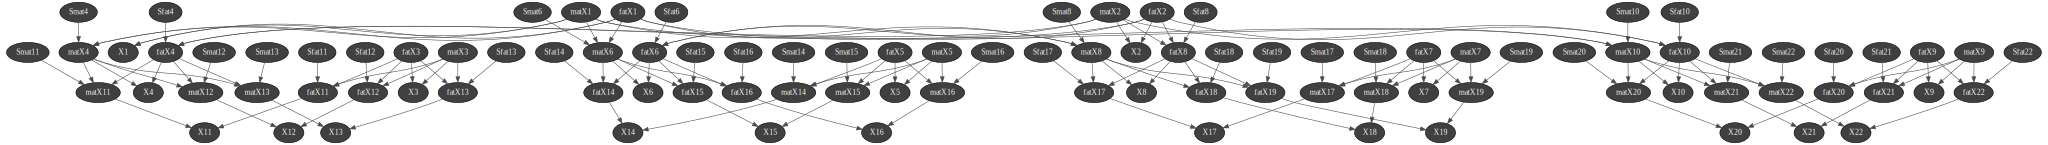

In [21]:
bn = bn(ped,0.01)

In [32]:
ped = pd.Pedigree()
ped.load('../data/ped/famRh.ped')

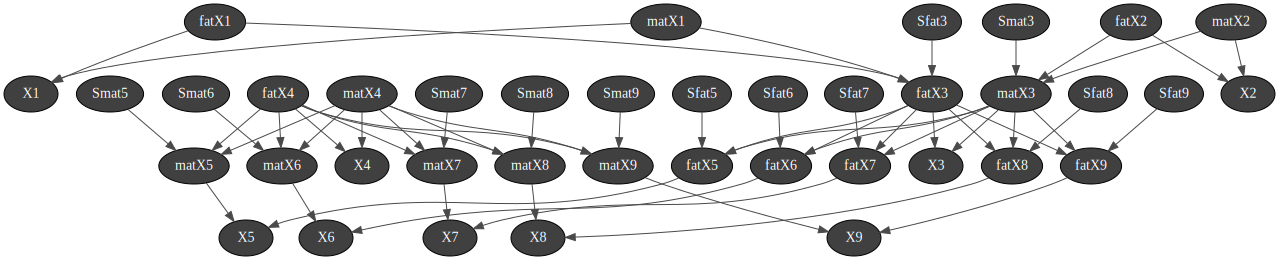

In [38]:
bn = bn(ped,0.01)

## Inference without evidence

In [39]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
for i in ped.get_pedigree().keys():
    print(ie.posterior(f"X{i}"))

<X1:00> :: 0.9801 /<X1:01> :: 0.0099 /<X1:10> :: 0.0099 /<X1:11> :: 0.0001
<X2:00> :: 0.9801 /<X2:01> :: 0.0099 /<X2:10> :: 0.0099 /<X2:11> :: 0.0001
<X3:00> :: 0.9801 /<X3:01> :: 0.0099 /<X3:10> :: 0.0099 /<X3:11> :: 0.0001
<X4:00> :: 0.9801 /<X4:01> :: 0.0099 /<X4:10> :: 0.0099 /<X4:11> :: 0.0001
<X5:00> :: 0.9801 /<X5:01> :: 0.0099 /<X5:10> :: 0.0099 /<X5:11> :: 0.0001
<X6:00> :: 0.9801 /<X6:01> :: 0.0099 /<X6:10> :: 0.0099 /<X6:11> :: 0.0001
<X7:00> :: 0.9801 /<X7:01> :: 0.0099 /<X7:10> :: 0.0099 /<X7:11> :: 0.0001
<X8:00> :: 0.9801 /<X8:01> :: 0.0099 /<X8:10> :: 0.0099 /<X8:11> :: 0.0001
<X9:00> :: 0.9801 /<X9:01> :: 0.0099 /<X9:10> :: 0.0099 /<X9:11> :: 0.0001


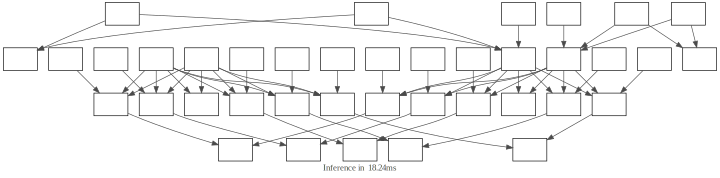

In [86]:
gnb.showInference(bn,size=10)

## Inference with evidence

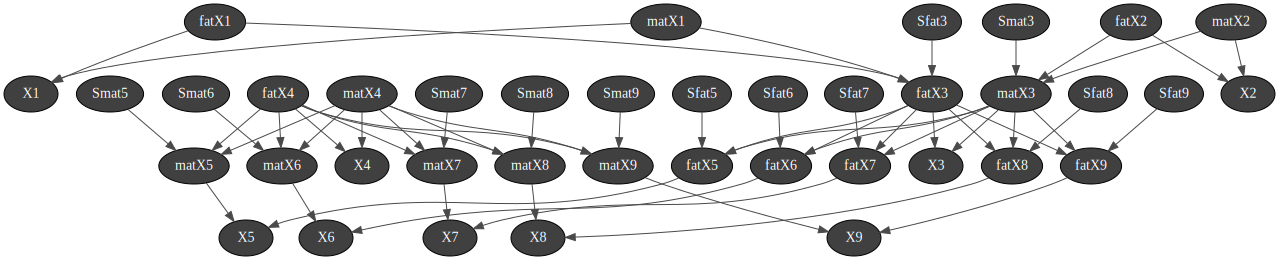

In [92]:
ped = pd.Pedigree()
ped.load('../data/ped/famRh.ped')
bn = bn(ped,0.01)

In [93]:
def load_evidence(file):
    tab = dict()
    with open(file,'r') as f:
        for (line,i) in enumerate(f.readlines()):
            ev = i.split()
            tab[line+1] = ev[2:]
    return tab

In [94]:
evidence = load_evidence('../data/famRh.ev')
evidence

{1: ['0', '1', '1', '1'],
 2: ['1', '0', '0', '0'],
 3: ['0', '1', '1', '1'],
 4: ['0', '1', '1', '1'],
 5: ['0', '1', '1', '1'],
 6: ['0', '1', '1', '1'],
 7: ['1', '0', '0', '0'],
 8: ['0', '1', '1', '1'],
 9: ['1', '0', '0', '0']}

In [95]:
for k,v in evidence.items():
    print(k)
    print([int(i) for i in v])
    ie.setEvidence({f'X{k}':[int(i) for i in v]})
ie.makeInference()

1
[0, 1, 1, 1]
2
[1, 0, 0, 0]
3
[0, 1, 1, 1]
4
[0, 1, 1, 1]
5
[0, 1, 1, 1]
6
[0, 1, 1, 1]
7
[1, 0, 0, 0]
8
[0, 1, 1, 1]
9
[1, 0, 0, 0]


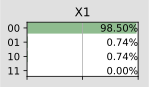

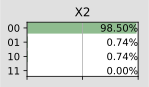

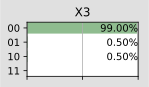

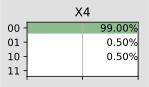

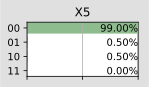

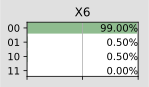

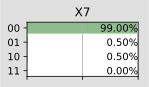

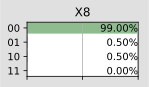

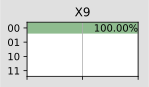

In [96]:
for i in ped.get_pedigree().keys():
    gnb.showProba(ie.posterior(f"X{i}"))

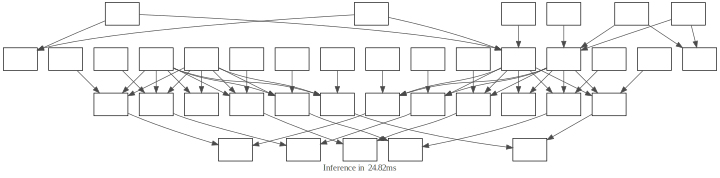

In [87]:
gnb.showInference(bn,size=10)

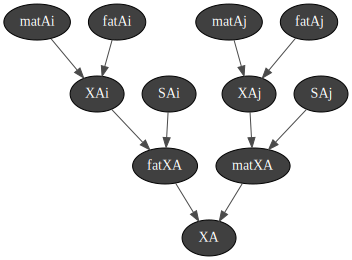

In [34]:
bn=gum.BayesNet()
bn.add(gum.LabelizedVariable("matAi","mother of A",["0","1"]))
bn.add(gum.LabelizedVariable("fatAi","father of A",["0","1"]))
bn.add(gum.LabelizedVariable("XAi","XAi",["00","01","10","11"]))
bn.add(gum.LabelizedVariable(f"SAi",f"Selector of fatID",["0","1"]))

bn.add(gum.LabelizedVariable("matAj","mother of A",["0","1"]))
bn.add(gum.LabelizedVariable("fatAj","father of A",["0","1"]))
bn.add(gum.LabelizedVariable("XAj","XAj",["00","01","10","11"]))
bn.add(gum.LabelizedVariable(f"SAj",f"Selector of matID",["0","1"]))

bn.add(gum.LabelizedVariable("fatXA","fat allele of A",["0","1"]))
bn.add(gum.LabelizedVariable("matXA","mat allele of A",["0","1"]))

bn.add(gum.LabelizedVariable("XA","A",["00","01","10","11"]))

bn.cpt("SAi").fillWith([0.5,0.5])
bn.cpt("SAj").fillWith([0.5,0.5])

bn.addArc("fatAi","XAi")
bn.addArc("matAi","XAi")
bn.addArc("SAi","fatXA")

bn.addArc("fatAj","XAj")
bn.addArc("matAj","XAj")
bn.addArc("SAj","matXA")

bn.addArc("XAi","fatXA")
bn.addArc("XAj","matXA")

bn.addArc("fatXA","XA")
bn.addArc("matXA","XA")

f = 0.05
gnb.showPotential(bn.cpt("fatXA").fillWith([1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1]))
gnb.showPotential(bn.cpt("matXA").fillWith([1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1]))
#gnb.showPotential(bn.cpt("XA").fillWith([(1-f)**2,0,0,0,0,f*(1-f),f*(1-f),0,0,f*(1-f),f*(1-f),0,0,0,0,f**2]))

gnb.showBN(bn)

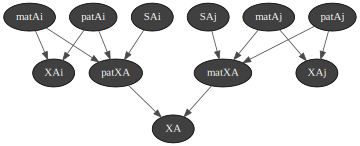

In [35]:
bn=gum.BayesNet()
bn.add(gum.LabelizedVariable("matAi","mother of A",["0","1"]))
bn.add(gum.LabelizedVariable("patAi","father of A",["0","1"]))
bn.add(gum.LabelizedVariable("XAi","XAi",["00","01","10","11"]))
bn.add(gum.LabelizedVariable(f"SAi",f"Selector of fatID",["0","1"]))

bn.add(gum.LabelizedVariable("matAj","mother of A",["0","1"]))
bn.add(gum.LabelizedVariable("patAj","father of A",["0","1"]))
bn.add(gum.LabelizedVariable("XAj","XAj",["00","01","10","11"]))
bn.add(gum.LabelizedVariable(f"SAj",f"Selector of matID",["0","1"]))

bn.add(gum.LabelizedVariable("patXA","pat allele of A",["0","1"]))
bn.add(gum.LabelizedVariable("matXA","mat allele of A",["0","1"]))

bn.add(gum.LabelizedVariable("XA","A",["00","01","10","11"]))

bn.cpt("SAi").fillWith([0.5,0.5])
bn.cpt("SAj").fillWith([0.5,0.5])

bn.addArc("patAi","XAi")
bn.addArc("matAi","XAi")
bn.addArc("SAi","patXA")

bn.addArc("patAj","XAj")
bn.addArc("matAj","XAj")
bn.addArc("SAj","matXA")

bn.addArc("patAi","patXA")
bn.addArc("matAi","patXA")

bn.addArc("patAj","matXA")
bn.addArc("matAj","matXA")

bn.addArc("patXA","XA")
bn.addArc("matXA","XA")

f = 0.05
gnb.showPotential(bn.cpt("patXA").fillWith([1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1]))
gnb.showPotential(bn.cpt("matXA").fillWith([1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1]))
#gnb.showPotential(bn.cpt("XA").fillWith([(1-f)**2,0,0,0,0,f*(1-f),f*(1-f),0,0,f*(1-f),f*(1-f),0,0,0,0,f**2]))

gnb.showBN(bn)